# Exercise 3

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch
import torchvision.transforms as transforms
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, LeakyReLU
import pandas as pd

## Loading MNIST dataset

In [2]:
MNIST_train = torchvision.datasets.MNIST(root="./data",  download=True)

In [3]:
MNIST_test = torchvision.datasets.MNIST(root="./data", train=False,  download=True)

In [4]:
def onehot_encoding(labels):
    classes = [0,1,2,3,4,5,6,7,8,9]
    one_hot = np.identity(len(classes))
    temp = []
    for label in labels:
        index = classes.index(label)
        temp.append(one_hot[index])
    dataset_onehot = np.array(temp)
    return dataset_onehot

In [5]:
x_train = []
y_train = []
for s in MNIST_train:
    image = s[0]
    label = s[1]
    x_train.append(np.array(image))
    y_train.append(np.array(label))
x_train = np.array(x_train)
y_train = np.array(y_train)

In [6]:
y_train = onehot_encoding(y_train)
x_train = np.reshape(x_train, (60000, 28, 28, 1))
print(np.array(y_train).shape)
print(np.array(x_train).shape)

(60000, 10)
(60000, 28, 28, 1)


In [7]:
x_test = []
y_test = []
for s in MNIST_test:
    image = s[0]
    label = s[1]
    x_test.append(np.array(image))
    y_test.append(np.array(label))
x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
y_test = onehot_encoding(y_test)
x_test = np.reshape(x_test, (10000, 28, 28, 1))
print(np.array(y_test).shape)
print(np.array(x_test).shape)

(10000, 10)
(10000, 28, 28, 1)


## Model

In [9]:
model = keras.Sequential()
model.add(layers.Conv2D(32, 3, strides=1, padding="same", activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, 3, strides=1, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(2))
model.add(layers.Flatten(name="flattenlayer"))
model.add(layers.Dense(3136, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [10]:
opt = keras.optimizers.Adam(learning_rate=1e-6)
model.compile(optimizer=opt, loss="CategoricalCrossentropy")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flattenlayer (Flatten)       (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 3136)              9837632   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## Training for one epoch

In [11]:
History = model.fit(x_train,y_train,validation_split=0.4,epochs=1)
extractor = keras.Model(inputs=model.inputs,
                        outputs=model.get_layer(name="flattenlayer").output)

1125/1125 [==============================] - 53s 47ms/step - loss: 6.0819 - val_loss: 0.7159


In [12]:
intermediate_output = extractor.predict(x_train)

## PCA after one epoch

In [21]:
def doPCA(data):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca.fit(data[0:5000])
    return pca

In [32]:
pca = doPCA(intermediate_output)
print(pca.explained_variance_ratio_)

[0.17106803 0.11856753]


In [33]:
transformed_data = pca.transform(intermediate_output[0:5000])

In [34]:
print(transformed_data[0])

[ 52.81808 129.1113 ]


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



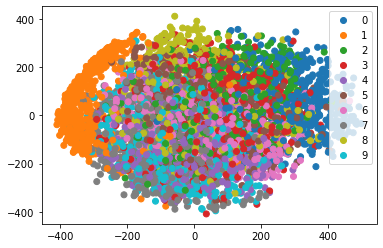

In [42]:
from matplotlib.colors import ListedColormap
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ListedColormap(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", 
          "tab:olive", "tab:cyan"])
values = []
i = 0
for point, label in zip(transformed_data, y_train):
    print(f"[{i}]/[5000]", end="\r", flush=True)
    value = np.argmax(label)
    values.append(value)
    i += 1
scatter = plt.scatter(x=transformed_data[:, 0], y=transformed_data[:, 1], c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

## t-SNE after one epoch

In [25]:
def doTSNE(data):
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2).fit_transform(data[0:5000])
    return tsne

In [14]:
transformed_data = doTSNE(intermediate_output)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



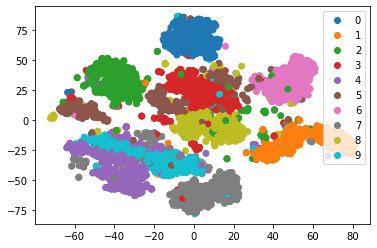

In [15]:
from matplotlib.colors import ListedColormap
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ListedColormap(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", 
          "tab:olive", "tab:cyan"])
values = []
i = 0
for point, label in zip(transformed_data, y_train):
    print(f"[{i}]/[5000]", end="\r", flush=True)
    value = np.argmax(label)
    values.append(value)
    i += 1
scatter = plt.scatter(x=transformed_data[:, 0], y=transformed_data[:, 1], c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

## traininng for 20 epochs

In [16]:
model = keras.Sequential()
model.add(layers.Conv2D(32, 3, strides=1, padding="same", activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, 3, strides=1, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(2))
model.add(layers.Flatten(name="flattenlayer"))
model.add(layers.Dense(3136, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [17]:
opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss="CategoricalCrossentropy")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flattenlayer (Flatten)       (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              9837632   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [18]:
History = model.fit(x_train,y_train,validation_split=0.4,epochs=20)
extractor = keras.Model(inputs=model.inputs,
                        outputs=model.get_layer(name="flattenlayer").output)

Epoch 1/20
1125/1125 [==============================] - 53s 46ms/step - loss: 6.1920 - val_loss: 0.1001
Epoch 2/20
1125/1125 [==============================] - 52s 46ms/step - loss: 0.0673 - val_loss: 0.1064
Epoch 3/20
1125/1125 [==============================] - 53s 47ms/step - loss: 0.0501 - val_loss: 0.1296
Epoch 4/20
1125/1125 [==============================] - 53s 47ms/step - loss: 0.0402 - val_loss: 0.0896
Epoch 5/20
1125/1125 [==============================] - 54s 48ms/step - loss: 0.0334 - val_loss: 0.1283
Epoch 6/20
1125/1125 [==============================] - 54s 48ms/step - loss: 0.0332 - val_loss: 0.1231
Epoch 7/20
1125/1125 [==============================] - 55s 49ms/step - loss: 0.0352 - val_loss: 0.1435
Epoch 8/20
1125/1125 [==============================] - 53s 47ms/step - loss: 0.0334 - val_loss: 0.1094
Epoch 9/20
1125/1125 [==============================] - 53s 47ms/step - loss: 0.0381 - val_loss: 0.1352
Epoch 10/20
1125/1125 [==============================] - 54s 48m

## PCA after 20 epochs

In [19]:
intermediate_output = extractor.predict(x_train)

In [22]:
pca = doPCA(intermediate_output)
print(pca.explained_variance_ratio_)

[0.08373171 0.05454065]


In [23]:
transformed_data = pca.transform(intermediate_output[0:5000])

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



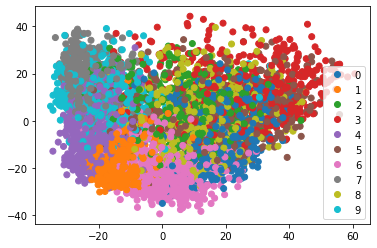

In [24]:
from matplotlib.colors import ListedColormap
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ListedColormap(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", 
          "tab:olive", "tab:cyan"])
values = []
i = 0
for point, label in zip(transformed_data, y_train):
    print(f"[{i}]/[5000]", end="\r", flush=True)
    value = np.argmax(label)
    values.append(value)
    i += 1
scatter = plt.scatter(x=transformed_data[:, 0], y=transformed_data[:, 1], c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

## t-SNE after 20 epochs

In [26]:
transformed_data = doTSNE(intermediate_output)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



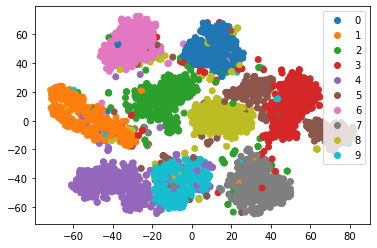

In [27]:
from matplotlib.colors import ListedColormap
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ListedColormap(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", 
          "tab:olive", "tab:cyan"])
values = []
i = 0
for point, label in zip(transformed_data, y_train):
    print(f"[{i}]/[5000]", end="\r", flush=True)
    value = np.argmax(label)
    values.append(value)
    i += 1
scatter = plt.scatter(x=transformed_data[:, 0], y=transformed_data[:, 1], c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)